**Identify zip codes of densely populated area**

In [1]:
import pandas as pd
import numpy as np
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
from scipy.cluster.vq import kmeans, kmeans2, vq
import pylab
#from sklearn.cluster import Ward

In [2]:
#First load file of zip codes with square land area and population number
#Graph  population number against square area and cluster

In [3]:
#Load file in dataframe

df = pd.read_csv('zcta2010.csv')

In [4]:
#File information for all zip codes in the USA
df

,ZCTA5,LANDSQMT,WATERSQMT,LANDSQMI,WATERSQMI,POPULATION,HSGUNITS,INTPTLAT,INTPTLON,Unnamed: 9,Unnamed: 10
0,601,166659789,799296,64.35,0.31,"18,570","7,744",18.180556,-66.749961,NaN,NaN
1,602,79288158,4446273,30.61,1.72,"41,520","18,073",18.362268,-67.176130,NaN,NaN
2,603,81880442,183425,31.61,0.07,"54,689","25,653",18.455183,-67.119887,NaN,NaN
3,606,109580061,12487,42.31,0.00,"6,615","2,877",18.158345,-66.932911,NaN,NaN
4,610,93021467,4172001,35.92,1.61,"29,016","12,618",18.290955,-67.125868,NaN,NaN
5,612,175106243,9809163,67.61,3.79,"67,010","30,992",18.402239,-66.711400,NaN,NaN
6,616,29870473,149147,11.53,0.06,"11,017","4,896",18.420413,-66.671979,NaN,NaN
7,617,39347158,3987969,15.19,1.54,"24,597","10,594",18.445146,-66.559696,NaN,NaN
8,622,75077028,1694917,28.99,0.65,"7,853","8,714",17.991245,-67.153993,NaN,NaN
9,623,98367847,1633540,37.98,0.63,"43,061","21,426",18.083435,-67.153877,NaN,NaN


**The zip code range for Massachusetts is 1001 - 2791**

In the file above, this is from row 131 - 668

In [5]:
df = df.iloc[131:668]
df = df.drop(['Unnamed: 9'], axis=1)
df = df.drop(['Unnamed: 10'], axis=1)
df

,ZCTA5,LANDSQMT,WATERSQMT,LANDSQMI,WATERSQMI,POPULATION,HSGUNITS,INTPTLAT,INTPTLON
131,1001,29635470,2229770,11.44,0.86,"16,769","7,557",42.062332,-72.628274
132,1002,142556362,4280260,55.04,1.65,"29,049","10,388",42.363977,-72.458507
133,1003,1842384,12788,0.71,0.00,"10,372",5,42.389941,-72.524108
134,1005,114586903,667042,44.24,0.26,"5,079","2,044",42.418848,-72.106598
135,1007,136345999,6943853,52.64,2.68,"14,649","5,839",42.279010,-72.400468
136,1008,139331467,5086093,53.80,1.96,"1,263",586,42.191846,-72.957325
137,1009,2065002,23,0.80,0.00,741,341,42.211969,-72.341433
138,1010,89982811,1420260,34.74,0.55,"3,609","1,598",42.129477,-72.205302
139,1011,81884563,342573,31.62,0.13,"1,370",659,42.300281,-72.968716
140,1012,33977749,545075,13.12,0.21,661,343,42.375425,-72.858192


In [24]:
#Create array of values to cluster
x = []
y = []
clusters = []
for i in range(537):
    x1 = df.iloc[i]['LANDSQMT']
    y1 = df.iloc[i]['POPULATION']
    y1 = locale.atoi(y1)
    if x1 == 0:
        continue
    else:
        x1 = 100000/float(x1)     #Since we are looking for urban places, plotting population inversely against 
        x.append(x1)              #land area will allow us to plot a graph according to density
        y.append(y1)
        clusters.append([x1, y1])


(-0.01, 0.2)

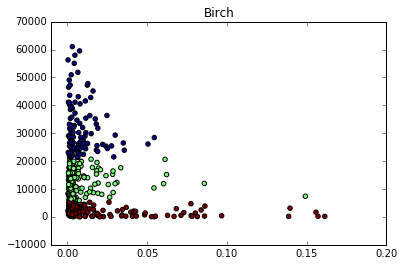

In [31]:
#We tried several different clustering methods
#Birch
y_pred = sklearn.cluster.Birch().fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("Birch")

plt.xlim([-0.01,0.2])

(-0.01, 0.2)

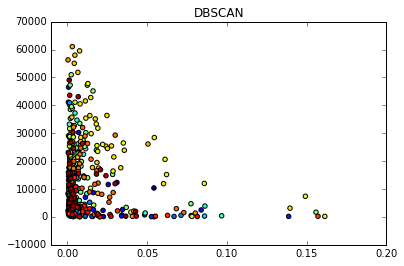

In [36]:
#DBSCAN
y_pred = sklearn.cluster.DBSCAN(min_samples = 1).fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("DBSCAN")

plt.xlim([-0.01,0.2])

(-0.01, 0.2)

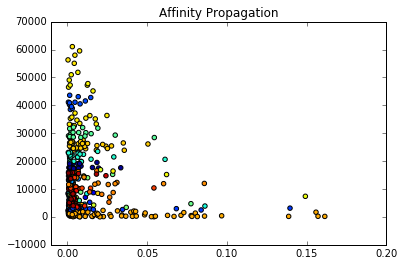

In [33]:
#Affinity Propagation
y_pred = sklearn.cluster.AffinityPropagation().fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("Affinity Propagation")

plt.xlim([-0.01,0.2])

(-0.01, 0.2)

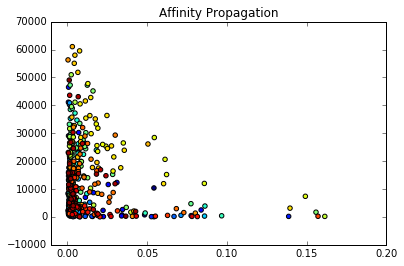

In [34]:
#Affinity Propagation with damping
y_pred = sklearn.cluster.AffinityPropagation(damping=0.7, preference = 3).fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("Affinity Propagation")

plt.xlim([-0.01,0.2])

(-0.01, 0.2)

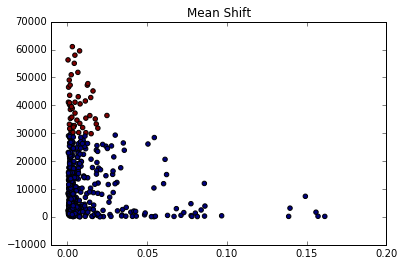

In [35]:
#Mean Shift
y_pred = sklearn.cluster.MeanShift().fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("Mean Shift")

plt.xlim([-0.01,0.2])

(-0.01, 0.2)

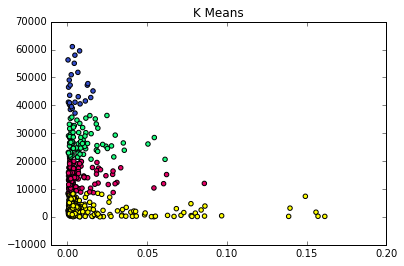

In [30]:
#K Means
res, idx = kmeans2(np.array(zip(x,y)),4)
colors = ([([1,1,0],[0.1,1,0.5 ],[0.9,0,0.4],[0.2,0.3,0.8])[i] for i in idx])
 
#plot colored points
pylab.scatter(x,y, c = colors)
plt.title("K Means")

pylab.xlim([-0.01,0.2])



(-0.001, 0.01)

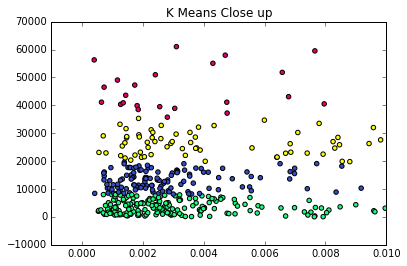

In [20]:
#Closer look at data points
pylab.scatter(x,y, c = colors)
plt.title("K Means Close up")
pylab.xlim([-0.001,0.01])


In [13]:
#Get the array of cluster coordinates 
code, dist = vq(clusters, res)